In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
from geopandas.datasets import naturalearth_cities, naturalearth_lowres
import pycountry
import pycountry_convert as pc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import DBSCAN, KMeans

%matplotlib inline

In [48]:
kenya = gpd.read_file('../02_data/03_geographic_data/KenyapolygonKenyapolygon0856/')

In [5]:
guardian = gpd.read_file('../02_data/04_language_data/guardian_language_shp/')

In [66]:
wals = gpd.read_file('../02_data/04_language_data/wals_full_language.csv')

In [67]:
for i in wals.index:
    wals['geometry'][i] = tuple((float(wals.longitude[i]), float(wals.latitude[i])))
wals['geometry'] = wals['geometry'].apply(Point)

In [131]:
wals.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
0,aab,,,Arapesh (Abu),-3.45,142.95,Kombio-Arapesh,Torricelli,,PG,...,,,,,,,,,,POINT (142.95 -3.45)
1,aar,aiw,aari1239,Aari,6.0,36.5833333333,South Omotic,Afro-Asiatic,Africa,ET,...,,,,,,,,,,POINT (36.5833333333 6)
2,aba,aau,abau1245,Abau,-4.0,141.25,Upper Sepik,Sepik,Papunesia,PG,...,,,,,,,,,,POINT (141.25 -4)
3,abb,shu,chad1249,Arabic (Chadian),13.8333333333,20.8333333333,Semitic,Afro-Asiatic,Africa,TD,...,,,,,,,,,,POINT (20.8333333333 13.8333333333)
4,abd,abi,abid1235,Abidji,5.66666666667,-4.58333333333,Kwa,Niger-Congo,Africa,CI,...,,,,,,,,,,POINT (-4.58333333333 5.66666666667)


In [6]:
guardian.rename(columns={'ISO639-3 c':'iso_code'},inplace=True)

In [12]:
guardian[guardian['Countries'] == 'Kenya']

,ID,Name in En,Countries,Country co,iso_code,Degree of,Alternate,Number of,Sources,Latitude,Longitude,Descriptio,Country,continent,geometry
615,91,Burji,Kenya,KEN,bji,Vulnerable,None,7000,Ethnologue,2.1857,37.9248,None,Kenya,Africa,POINT (37.9248 2.1857)
836,99,Boni,Kenya,KEN,bob,Definitely endangered,"Aweera, Waata, Sanye\n\n",3000,Bernd Heine,-0.8294,40.8142,Somalia-Kenyan border area.,Kenya,Africa,POINT (40.8142 -0.8294)
1152,95,Bong'om,Kenya,KEN,spy,Definitely endangered,None,1000,None,1.1315,35.0134,Near the Ugandan-Kenyan border.,Kenya,Africa,POINT (35.0134 1.1315)
1458,101,Dahalo,Kenya,KEN,dal,Severely endangered,None,400,"Mauro Tosco, Ed Elderkin",-2.2625,40.7537,Near of the mouth of the Tana river.,Kenya,Africa,POINT (40.7537 -2.2625)
1653,102,Ongamo,Kenya,KEN,nsg,Critically endangered,Nagza,200,Christoph Winter,-2.932,37.4853,"Along the Tanzanian-Kenyan border, next to the...",Kenya,Africa,POINT (37.4853 -2.932)
1911,98,Omotik,Kenya,KEN,omt,Critically endangered,Laamoot,50,"Franz Rottland, Ethnologue",-1.115,35.9143,None,Kenya,Africa,POINT (35.9143 -1.115)
2345,92,Elmolo,Kenya,KEN,elo,Extinct,None,0,Bernd Heine,2.7212,36.7326,None,Kenya,Africa,POINT (36.7326 2.7212)
2392,137,Kinare,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.725,37.2436,None,Kenya,Africa,POINT (37.2436 -0.725)
2395,100,Kore,Kenya,KEN,None,Extinct,None,0,Bernd Heine,-2.2845,40.9185,Last speaker lived on Lamu Island.,0,0,POINT (40.9185 -2.2845)
2415,93,Lorkoti,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.4943,37.359,None,Kenya,Africa,POINT (37.359 -0.4943)


In [69]:
wals[wals['countrycodes'].str.contains('KE')]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
384,buk,bxk,buku1249,Bukusu,0.75,34.6666666667,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.6666666667 0.75)
548,dah,dal,daha1245,Dahalo,-2.33333333333,40.5,Dahalo,Afro-Asiatic,Africa,KE,...,,,,,,,,,,POINT (40.5 -2.33333333333)
556,dbd,dav,tait1250,Dabida,-4.0,38.6666666667,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (38.6666666667 -4)
810,gus,guz,gusi1247,Gusii,-0.75,34.8333333333,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.8333333333 -0.75)
1021,kba,kam,kamb1297,Kamba,-1.5,38.0,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (38 -1.5)
1077,kik,kik,kiku1240,Kikuyu,-0.75,36.75,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (36.75 -0.75)
1206,ksl,xki,keny1241,Kenyan Sign Language,0.0,38.0,Sign Languages,other,Africa,KE,...,,,,,,,,,,POINT (38 0)
1365,luo,luo,luok1236,Luo,-0.5,34.75,Nilotic,Eastern Sudanic,Africa,TZ KE,...,,,,,,,,,,POINT (34.75 -0.5)
1370,luy,luy,saam1283,Luyia,0.416666666667,34.5,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.5 0.416666666667)
1373,maa,mas,masa1300,Maasai,-3.0,36.0,Nilotic,Eastern Sudanic,Africa,KE TZ,...,1 No m in first person singular,,,,5 TAM+polarity,,,1 None reported,,POINT (36 -3)


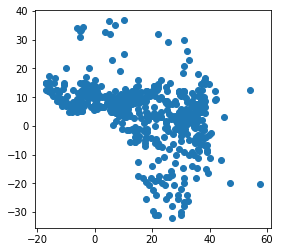

In [25]:
wals[wals['macroarea']=='Africa'].plot()

In [70]:
wals_kenya = wals[wals['countrycodes'].str.contains('KE')]

In [72]:
columns_to_drop = ['1A Consonant Inventories',
 '2A Vowel Quality Inventories',
 '3A Consonant-Vowel Ratio',
 '4A Voicing in Plosives and Fricatives',
 '5A Voicing and Gaps in Plosive Systems',
 '6A Uvular Consonants',
 '7A Glottalized Consonants',
 '8A Lateral Consonants',
 '9A The Velar Nasal',
 '10A Vowel Nasalization',
 '11A Front Rounded Vowels',
 '12A Syllable Structure',
 '13A Tone',
 '14A Fixed Stress Locations',
 '15A Weight-Sensitive Stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems',
 '17A Rhythm Types',
 '18A Absence of Common Consonants',
 '19A Presence of Uncommon Consonants',
 '20A Fusion of Selected Inflectional Formatives',
 '21A Exponence of Selected Inflectional Formatives',
 '22A Inflectional Synthesis of the Verb',
 '23A Locus of Marking in the Clause',
 '24A Locus of Marking in Possessive Noun Phrases',
 '25A Locus of Marking: Whole-language Typology',
 '26A Prefixing vs. Suffixing in Inflectional Morphology',
 '27A Reduplication',
 '28A Case Syncretism',
 '29A Syncretism in Verbal Person/Number Marking',
 '30A Number of Genders',
 '31A Sex-based and Non-sex-based Gender Systems',
 '32A Systems of Gender Assignment',
 '33A Coding of Nominal Plurality',
 '34A Occurrence of Nominal Plurality',
 '35A Plurality in Independent Personal Pronouns',
 '36A The Associative Plural',
 '37A Definite Articles',
 '38A Indefinite Articles',
 '39A Inclusive/Exclusive Distinction in Independent Pronouns',
 '40A Inclusive/Exclusive Distinction in Verbal Inflection',
 '41A Distance Contrasts in Demonstratives',
 '42A Pronominal and Adnominal Demonstratives',
 '43A Third Person Pronouns and Demonstratives',
 '44A Gender Distinctions in Independent Personal Pronouns',
 '45A Politeness Distinctions in Pronouns',
 '46A Indefinite Pronouns',
 '47A Intensifiers and Reflexive Pronouns',
 '48A Person Marking on Adpositions',
 '49A Number of Cases',
 '50A Asymmetrical Case-Marking',
 '51A Position of Case Affixes',
 '52A Comitatives and Instrumentals',
 '53A Ordinal Numerals',
 '54A Distributive Numerals',
 '55A Numeral Classifiers',
 '56A Conjunctions and Universal Quantifiers',
 '57A Position of Pronominal Possessive Affixes',
 '58A Obligatory Possessive Inflection',
 '59A Possessive Classification',
 '60A Genitives, Adjectives and Relative Clauses',
 '61A Adjectives without Nouns',
 '62A Action Nominal Constructions',
 '63A Noun Phrase Conjunction',
 '64A Nominal and Verbal Conjunction',
 '65A Perfective/Imperfective Aspect',
 '66A The Past Tense',
 '67A The Future Tense',
 '68A The Perfect',
 '69A Position of Tense-Aspect Affixes',
 '70A The Morphological Imperative',
 '71A The Prohibitive',
 '72A Imperative-Hortative Systems',
 '73A The Optative',
 '74A Situational Possibility',
 '75A Epistemic Possibility',
 '76A Overlap between Situational and Epistemic Modal Marking',
 '77A Semantic Distinctions of Evidentiality',
 '78A Coding of Evidentiality',
 '79A Suppletion According to Tense and Aspect',
 '80A Verbal Number and Suppletion',
 '81A Order of Subject, Object and Verb',
 '82A Order of Subject and Verb',
 '83A Order of Object and Verb',
 '84A Order of Object, Oblique, and Verb',
 '85A Order of Adposition and Noun Phrase',
 '86A Order of Genitive and Noun',
 '87A Order of Adjective and Noun',
 '88A Order of Demonstrative and Noun',
 '89A Order of Numeral and Noun',
 '90A Order of Relative Clause and Noun',
 '91A Order of Degree Word and Adjective',
 '92A Position of Polar Question Particles',
 '93A Position of Interrogative Phrases in Content Questions',
 '94A Order of Adverbial Subordinator and Clause',
 '95A Relationship between the Order of Object and Verb and the Order of Adposition and Noun Phrase',
 '96A Relationship between the Order of Object and Verb and the Order of Relative Clause and Noun',
 '97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun',
 '98A Alignment of Case Marking of Full Noun Phrases',
 '99A Alignment of Case Marking of Pronouns',
 '100A Alignment of Verbal Person Marking',
 '101A Expression of Pronominal Subjects',
 '102A Verbal Person Marking',
 '103A Third Person Zero of Verbal Person Marking',
 '104A Order of Person Markers on the Verb',
 "105A Ditransitive Constructions: The Verb 'Give'",
 '106A Reciprocal Constructions',
 '107A Passive Constructions',
 '108A Antipassive Constructions',
 '109A Applicative Constructions',
 '110A Periphrastic Causative Constructions',
 '111A Nonperiphrastic Causative Constructions',
 '112A Negative Morphemes',
 '113A Symmetric and Asymmetric Standard Negation',
 '114A Subtypes of Asymmetric Standard Negation',
 '115A Negative Indefinite Pronouns and Predicate Negation',
 '116A Polar Questions',
 '117A Predicative Possession',
 '118A Predicative Adjectives',
 '119A Nominal and Locational Predication',
 '120A Zero Copula for Predicate Nominals',
 '121A Comparative Constructions',
 '122A Relativization on Subjects',
 '123A Relativization on Obliques',
 "124A 'Want' Complement Subjects",
 '125A Purpose Clauses',
 "126A 'When' Clauses",
 '127A Reason Clauses',
 '128A Utterance Complement Clauses',
 '129A Hand and Arm',
 '130A Finger and Hand',
 '131A Numeral Bases',
 '132A Number of Non-Derived Basic Colour Categories',
 '133A Number of Basic Colour Categories',
 '134A Green and Blue',
 '135A Red and Yellow',
 '136A M-T Pronouns',
 '137A N-M Pronouns',
 '138A Tea',
 '139A Irregular Negatives in Sign Languages',
 '140A Question Particles in Sign Languages',
 '141A Writing Systems',
 '142A Para-Linguistic Usages of Clicks',
 '143F Postverbal Negative Morphemes',
 '90B Prenominal relative clauses',
 '144Y The Position of Negative Morphemes in Object-Initial Languages',
 '90C Postnominal relative clauses',
 '144P NegSOV Order',
 '144J SVNegO Order',
 '144N Obligatory Double Negation in SOV languages',
 '144S SOVNeg Order',
 '144X Verb-Initial with Clause-Final Negative',
 '144A Position of Negative Word With Respect to Subject, Object, and Verb',
 '90G Double-headed relative clauses',
 '90E Correlative relative clauses',
 '144V Verb-Initial with Preverbal Negative',
 '144I SNegVO Order',
 '144R SONegV Order',
 '143B Obligatory Double Negation',
 '144M Multiple Negative Constructions in SOV Languages',
 '144U Double negation in verb-initial languages',
 '144G Optional Double Negation in SVO languages',
 '144K SVONeg Order',
 '144B Position of negative words relative to beginning and end of clause and with respect to adjacency to verb',
 '144F Obligatory Double Negation in SVO languages',
 '90D Internally-headed relative clauses',
 '144E Multiple Negative Constructions in SVO Languages',
 '144D The Position of Negative Morphemes in SVO Languages',
 '81B Languages with two Dominant Orders of Subject, Object, and Verb',
 '143E Preverbal Negative Morphemes',
 '143C Optional Double Negation',
 '90F Adjoined relative clauses',
 '143A Order of Negative Morpheme and Verb',
 '144W Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object',
 '144O Optional Double Negation in SOV languages',
 '144Q SNegOV Order',
 '144L The Position of Negative Morphemes in SOV Languages',
 '144H NegSVO Order',
 '144C Languages with different word order in negative clauses',
 '144T The Position of Negative Morphemes in Verb-Initial Languages',
 '143G Minor morphological means of signaling negation',
 '143D Optional Triple Negation',
 '39B Inclusive/Exclusive Forms in Pama-Nyungan',
 '137B M in Second Person Singular',
 '136B M in First Person Singular',
 '109B Other Roles of Applied Objects',
 '10B Nasal Vowels in West Africa',
 '25B Zero Marking of A and P Arguments',
 '21B Exponence of Tense-Aspect-Mood Inflection',
 '108B Productivity of the Antipassive Construction',
 "130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand'",
 '58B Number of Possessive Nouns',
 '79B Suppletion in Imperatives and Hortatives']

In [73]:
wals_kenya.drop(columns=columns_to_drop, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
wals_kenya.head(1)

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,geometry
384,buk,bxk,buku1249,Bukusu,0.75,34.6666666667,Bantoid,Niger-Congo,Africa,KE,POINT (34.6666666667 0.75)


In [7]:
guardian

,ID,Name in En,Countries,Country co,iso_code,Degree of,Alternate,Number of,Sources,Latitude,Longitude,Descriptio,Country,continent,geometry
0,1022,South Italian,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; ????????????...,7500000,None,40.9798,15.249,"Campania, Lucania (Basilicata), Abruzzi (Abruz...",Italy,Europe,POINT (15.249 40.9798)
1,1023,Sicilian,Italy,ITA,scn,Vulnerable,None,5000000,None,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri...",Italy,Europe,POINT (14.5019 37.4399)
2,383,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",4800000,None,53.4029,10.3601,"northern Germany, the north-eastern part of th...",Germany,Europe,POINT (10.3601 53.4029)
3,335,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,None,4000000,Hienad? Cychun: Weißrussisch. ? Lexikon der Sp...,53.956,27.5756,Belarus except the Polesian-speaking south-wes...,Belarus,Europe,POINT (27.5756 53.956)
4,382,Lombard,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,None,3500000,None,45.7215,9.327299999999999,the region of Lombardy (except the southernmos...,Italy,Europe,POINT (9.327299999999999 45.7215)
5,405,Romani,"Albania, Germany, Austria, Belarus, Bosnia and...","ALB, DEU, AUT, BRB, BIH, BGR, HRV, EST, FIN, F...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",3500000,Yaron Matras: Romani: a linguistic introductio...,46.3165,22.3681,"many European countries, most densely in East-...",Romania,Europe,POINT (22.3681 46.3165)
6,2211,Yiddish (Israel),Israel,ISR,ydd,Definitely endangered,Judeo-German,3000000,Neil G. Jacobs: Yiddish: a linguistic introduc...,32.0833,34.8333,"most speakers now live outside Europe, mainly ...",Israel,Asia,POINT (34.8333 32.0833)
7,1586,Gondi,India,IND,gon,Vulnerable,Gondi; Gaudi; Gondiva; Gondwadi; Goondile; Gou...,2713790,None,19.5804,80.4418,"Madhya Pradesh (Betul, Chhindwara, Seoni, Mand...",India,Asia,POINT (80.4418 19.5804)
8,1020,Limburgian-Ripuarian,"Germany, Belgium, Netherlands","DEU, BEL, NLD","ksh, lim",Vulnerable,Colognian (dialect; in German: Kölsch),2600000,None,50.7781,6.0864,Limburg provinces in Belgium and the Netherlan...,Belgium,Europe,POINT (6.0864 50.7781)
9,1943,Quechua of Southern Bolivia,Bolivia (Plurinational State of),BOL,quh,Vulnerable,None,2300000,None,-18.0675,-65.7641,"Departments of Cochabamba, Chuquisaca, Potosí ...",Bolivia,South America,POINT (-65.7641 -18.0675)


In [8]:
guardian.rename(columns={'Latitude':'latitude','Longitude':'longitude','Name in En':'Name'}, inplace=True)

In [76]:
kenya_lang = gpd.GeoDataFrame(pd.concat([guardian[guardian['Countries'] == 'Kenya'],wals_kenya], ignore_index=True) )

In [38]:
kenya_lang.drop(columns=['Alternate','Countries','Country',
                         'Country co','Descriptio','ID',
                         'countrycodes','family','genus',
                         'glottocode','Sources','continent',
                         'macroarea','wals_code'
                        ],
                inplace=True
               )

In [54]:
kenya_mammalia = pd.read_table('../02_data/01_biodiversity_data/Kenya_Mammalia.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [41]:
kenya_mammalia.isnull().sum()

gbifID                               0
datasetKey                           0
occurrenceID                      5656
kingdom                              0
phylum                               0
class                                0
order                              181
family                             640
genus                             2180
species                           9780
infraspecificEpithet             54337
taxonRank                            0
scientificName                       0
countryCode                          0
locality                          4943
publishingOrgKey                     0
decimalLatitude                      0
decimalLongitude                     0
coordinateUncertaintyInMeters    46797
coordinatePrecision              52988
elevation                        42551
elevationAccuracy                55472
depth                            56712
depthAccuracy                    56712
eventDate                         9282
day                      

In [58]:
kenya_mammalia.drop(columns=['gbifID','datasetKey','occurrenceID',
                             'kingdom','phylum','class','order','family',
                            'infraspecificEpithet','taxonRank','scientificName',
                             'locality','publishingOrgKey','coordinateUncertaintyInMeters',
                             'coordinatePrecision','elevation','elevationAccuracy','depth',
                             'depthAccuracy','eventDate','day','month','speciesKey','basisOfRecord',
                             'institutionCode','collectionCode','catalogNumber','recordNumber',
                             'identifiedBy','dateIdentified','license','rightsHolder','recordedBy',
                             'typeStatus','establishmentMeans','lastInterpreted','mediaType','issue'],
                    inplace=True
                   )

In [59]:
kenya_mammalia_geo = gpd.GeoDataFrame(kenya_mammalia)

In [60]:
kenya_mammalia_geo['geometry'] = 0

In [61]:
kenya_mammalia_geo

,genus,species,countryCode,decimalLatitude,decimalLongitude,year,taxonKey,geometry
0,Cercopithecus,Cercopithecus mitis,KE,-3.303955,40.014855,2008.0,5786268,0
1,Cercopithecus,Cercopithecus mitis,KE,-1.361333,36.785562,2008.0,5786289,0
2,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
3,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
4,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
5,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
6,Chlorocebus,Chlorocebus pygerythrus,KE,-0.375593,36.095693,2006.0,4267128,0
7,Acinonyx,Acinonyx jubatus,KE,-1.516762,34.996818,2006.0,2435270,0
8,Madoqua,Madoqua kirkii,KE,-0.375593,36.095693,2006.0,2441001,0
9,Connochaetes,Connochaetes taurinus,KE,-1.415182,34.941703,2006.0,2441105,0


In [62]:
geo_array = []
for i in kenya_mammalia_geo.index:
    geo_array.append(tuple((float(kenya_mammalia_geo.decimalLongitude[i]), 
                                               float(kenya_mammalia_geo.decimalLatitude[i]))))

In [63]:
kenya_mammalia_geo['geometry'] = geo_array

In [64]:
kenya_mammalia_geo['geometry'] = kenya_mammalia_geo['geometry'].apply(Point)

In [49]:
kenya.head()

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,rpath,ISO3166_2,geometry
0,3495537,KEN,Baringo,None,Baringo,None,administrative,4,Q808201,None,2018-10-06 07:05:21,None,"3495537,192798,0",KE-01,"POLYGON ((35.5234935 0.0131824, 35.5242973 0.0..."
1,3338139,KEN,Bomet,None,Bomet,None,administrative,4,Q891952,None,2018-10-06 07:05:21,None,"3338139,192798,0",KE-02,"POLYGON ((35.0129447 -0.8826423, 35.0147147 -0..."
2,3495538,KEN,Bungoma,None,Bungoma,None,administrative,4,Q2928204,None,2018-10-06 07:05:21,None,"3495538,192798,0",KE-03,"POLYGON ((34.3624595 0.7754809, 34.3624954 0.7..."
3,3486321,KEN,Busia,None,Busia,None,administrative,4,Q1017519,None,2018-10-06 07:05:21,None,"3486321,192798,0",KE-04,(POLYGON ((33.91340705609331 0.097341725466683...
4,3495539,KEN,Elegeyo-Marakwet,None,Elegeyo-Marakwet,None,administrative,4,Q15216433,None,2018-10-06 07:05:21,None,"3495539,192798,0",KE-05,"POLYGON ((35.152288 1.1982292, 35.2011161 1.17..."


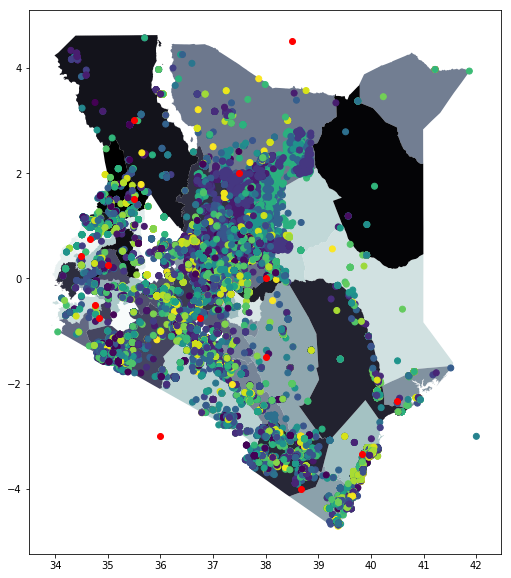

In [77]:
base = kenya.plot(figsize=(10,10), column='name', cmap='bone_r')
kenya_mammalia_geo.dropna().plot(column='genus',categorical=True,ax=base, cmap='viridis')
wals_kenya.plot(color='red',ax=base);

In [9]:
guardian['Number of'].fillna(0,inplace=True)

In [10]:
guardian.drop(columns=['ID','Alternate','Sources','Countries','Descriptio'], inplace=True)

In [11]:
guardian.rename(columns={'Name' : 'name',
                         'Country co' : 'country_code',
                         'Degree of' : 'vulnerability',
                         'Number of' : 'speakers',
                         'Country' : 'country'
                        },
                inplace=True
               )

In [12]:
guardian['country_code'] = guardian['country_code'].str[:3]

In [13]:
guardian[['speakers','latitude','longitude']] = guardian[['speakers','latitude','longitude']].astype(float)

In [14]:
guardian['speaker_bin']  = pd.cut(guardian['speakers'],10)

In [23]:
guardian['speakers'].describe()

count    2.722000e+03
mean     5.005142e+04
std      3.011062e+05
min      0.000000e+00
25%      2.000000e+01
50%      5.180000e+02
75%      5.749750e+03
max      7.500000e+06
Name: speakers, dtype: float64

In [40]:
non_zero_speakers = guardian[guardian['speakers'] > 0]

TypeError: must be str, not float

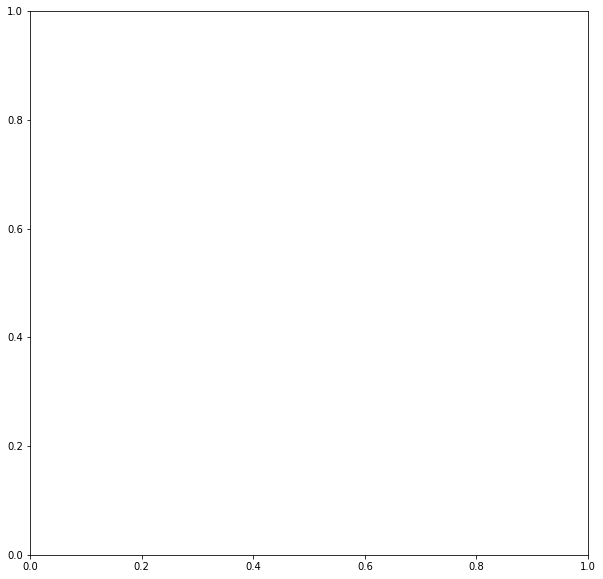

In [46]:
plt.figure(figsize=(10,10))
plt.boxplot(non_zero_speakers[non_zero_speakers['speakers'] < 10000]);
# plt.xlim(0,100_000)

In [18]:
guardian['iso_code'] = guardian['iso_code'].str[:3]

In [19]:
guardian.head()

,name,country_code,iso_code,vulnerability,speakers,latitude,longitude,country,continent,geometry,speaker_bin
0,South Italian,ITA,nap,Vulnerable,7500000.0,40.9798,15.2490,Italy,Europe,POINT (15.249 40.9798),"(6750000.0, 7500000.0]"
1,Sicilian,ITA,scn,Vulnerable,5000000.0,37.4399,14.5019,Italy,Europe,POINT (14.5019 37.4399),"(4500000.0, 5250000.0]"
2,Low Saxon,DEU,act,Vulnerable,4800000.0,53.4029,10.3601,Germany,Europe,POINT (10.3601 53.4029),"(4500000.0, 5250000.0]"
3,Belarusian,BRB,bel,Vulnerable,4000000.0,53.9560,27.5756,Belarus,Europe,POINT (27.5756 53.956),"(3750000.0, 4500000.0]"
4,Lombard,ITA,lmo,Definitely endangered,3500000.0,45.7215,9.3273,Italy,Europe,POINT (9.327299999999999 45.7215),"(3000000.0, 3750000.0]"


In [96]:
guardian.to_file('../02_data/04_language_data/clean_guardian_endangered.shp')

## World Spiders

In [87]:
spiders = pd.read_table('../02_data/01_biodiversity_data/World_Arachnida.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [ ]:
spiders

In [88]:
spiders.drop(columns=['gbifID','datasetKey','occurrenceID',
                             'kingdom','phylum','class','order','family',
                            'infraspecificEpithet','taxonRank','scientificName',
                             'locality','publishingOrgKey','coordinateUncertaintyInMeters',
                             'coordinatePrecision','elevation','elevationAccuracy','depth',
                             'depthAccuracy','eventDate','day','month','speciesKey','basisOfRecord',
                             'institutionCode','collectionCode','catalogNumber','recordNumber',
                             'identifiedBy','dateIdentified','license','rightsHolder','recordedBy',
                             'typeStatus','establishmentMeans','lastInterpreted','mediaType','issue'],
                    inplace=True
                   )

In [89]:
spiders_geo = gpd.GeoDataFrame(spiders)

In [90]:
spiders_geo['geometry'] = 0

In [91]:
geo_array = []
for i in spiders_geo.index:
    geo_array.append(tuple((float(spiders_geo.decimalLongitude[i]), 
                                               float(spiders_geo.decimalLatitude[i]))))

In [92]:
spiders_geo['geometry'] = geo_array

In [93]:
spiders_geo['geometry'] = spiders_geo['geometry'].apply(Point)

### Run from here to bypass cleaning

In [15]:
endangered = gpd.read_file('../02_data/04_language_data/clean_guardian_endangered/')

In [83]:
endangered.head()

,name,country_co,iso_code,vulnerabil,speakers,latitude,longitude,country,continent,geometry
0,South Italian,ITA,nap,Vulnerable,7500000.0,40.9798,15.2490,Italy,Europe,POINT (15.249 40.9798)
1,Sicilian,ITA,scn,Vulnerable,5000000.0,37.4399,14.5019,Italy,Europe,POINT (14.5019 37.4399)
2,Low Saxon,DEU,"act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,4800000.0,53.4029,10.3601,Germany,Europe,POINT (10.3601 53.4029)
3,Belarusian,BRB,bel,Vulnerable,4000000.0,53.9560,27.5756,Belarus,Europe,POINT (27.5756 53.956)
4,Lombard,ITA,lmo,Definitely endangered,3500000.0,45.7215,9.3273,Italy,Europe,POINT (9.327299999999999 45.7215)


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

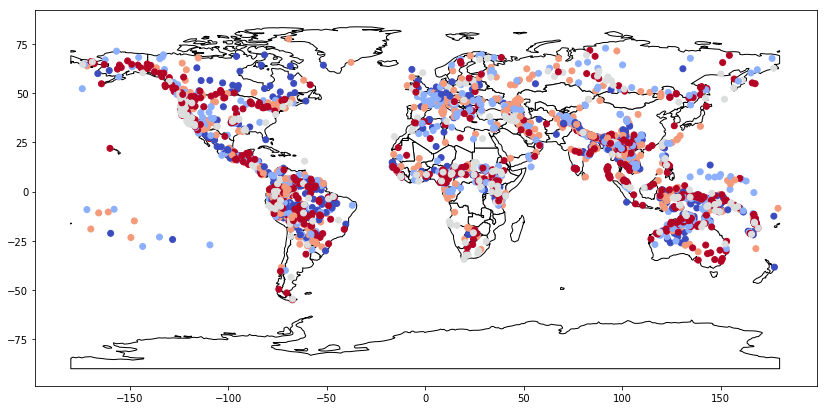

In [85]:
base = world.plot(figsize=(14,10),color='white',edgecolor='black')
endangered.plot(ax=base, column='vulnerabil', categorical=True, cmap='coolwarm_r');

In [97]:
spiders_geo.head()

,genus,species,countryCode,decimalLatitude,decimalLongitude,year,taxonKey,geometry
0,NaN,NaN,CA,58.74,-93.82,2009,6066,POINT (-93.81999999999999 58.74)
1,Pardosa,Pardosa hortensis,BG,41.41,23.56,2009,2146311,POINT (23.56 41.41)
2,Pachylaelaps,NaN,CA,58.63,-94.23,2009,4336748,POINT (-94.23 58.63)
3,Agelena,Agelena labyrinthica,DE,48.40,11.48,2009,2139576,POINT (11.48 48.4)
4,Zygoseius,NaN,CA,58.63,-94.23,2009,4664675,POINT (-94.23 58.63)


In [111]:
spiders_geo.drop(index=spiders_geo[spiders_geo['countryCode'] == 'AQ'].index, inplace=True)

In [115]:
spiders_geo.drop(index=spiders_geo[spiders_geo['countryCode'] == 'TL'].index, inplace=True)

In [117]:
spiders_geo.drop(index=spiders_geo[spiders_geo['countryCode'] == 'TF'].index, inplace=True)

In [119]:
spiders_geo['continentCode'] = spiders_geo['countryCode'].dropna().apply(pc.country_alpha2_to_continent_code)

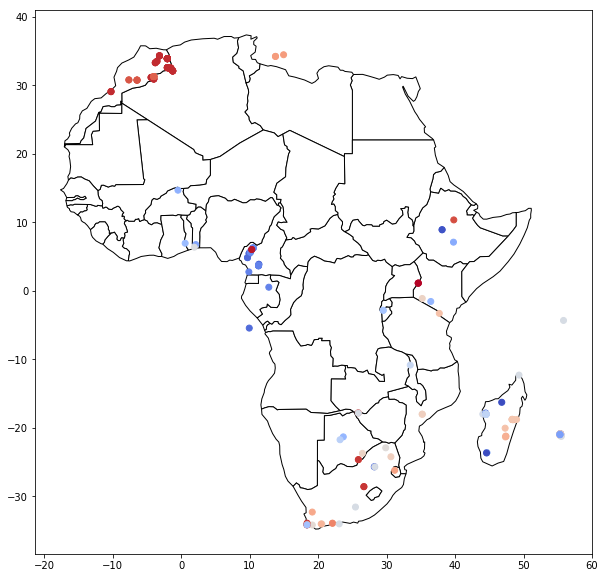

In [122]:
base = world[world['continent']=='Africa'].plot(figsize=(14,10),color='white',edgecolor='black')
spiders_geo[spiders_geo['continentCode'] == 'AF'].dropna().plot(ax=base, column='genus', categorical=True, cmap='coolwarm_r');


In [121]:
spiders_geo

,genus,species,countryCode,decimalLatitude,decimalLongitude,year,taxonKey,geometry,continentCode
0,NaN,NaN,CA,58.740000,-93.820000,2009,6066,POINT (-93.81999999999999 58.74),NA
1,Pardosa,Pardosa hortensis,BG,41.410000,23.560000,2009,2146311,POINT (23.56 41.41),EU
2,Pachylaelaps,NaN,CA,58.630000,-94.230000,2009,4336748,POINT (-94.23 58.63),NA
3,Agelena,Agelena labyrinthica,DE,48.400000,11.480000,2009,2139576,POINT (11.48 48.4),EU
4,Zygoseius,NaN,CA,58.630000,-94.230000,2009,4664675,POINT (-94.23 58.63),NA
5,NaN,NaN,US,38.710000,-104.840000,2009,9712,POINT (-104.84 38.71),NA
6,Fuscozetes,NaN,CA,45.390000,-78.910000,2009,2198717,POINT (-78.91 45.39),NA
7,Ceratoppia,Ceratoppia quadridentata,CA,58.730000,-93.780000,2009,2194249,POINT (-93.78 58.73),NA
8,Micaria,Micaria pulicaria,FR,49.460000,1.080000,2009,5168243,POINT (1.08 49.46),EU
9,Pachygnatha,Pachygnatha degeeri,FR,49.460000,1.080000,2009,5170070,POINT (1.08 49.46),EU


In [128]:
kenya_mammalia_cluster = kenya_mammalia_geo[['genus','species','taxonKey',
                    'decimalLatitude','decimalLongitude']].rename(columns={'decimalLatitude':'latitude',
                                                                           'decimalLongitude':'longitude'})

In [130]:
kenya_lang

NameError: name 'kenya_lang' is not defined